## 1.. Read csv data or how to load data  ! 

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [133]:
comments = pd.read_csv(r'UScomments.csv' , on_bad_lines="skip")

In [134]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [135]:
comments.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [136]:
comments.dropna(inplace=True)

In [137]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

## 2.. Perform Sentiment Analysis

In [138]:
from textblob import TextBlob

In [139]:
comments.head(6)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0


In [140]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

0.0

In [141]:
comments.shape

(691374, 4)

In [142]:
polarity = []

for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [143]:
len(polarity)

691374

In [144]:
comments['polarity']  = polarity

In [145]:
comments.head(5)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


## 3..  Wordcloud Analysis of your data

In [146]:
filter1 = comments['polarity']==1

In [147]:
comments_positive = comments[filter1]

In [148]:
filter2 = comments['polarity']==-1

In [149]:
comments_negative = comments[filter2]

In [150]:
comments_positive.head(5)

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [151]:
from wordcloud import WordCloud , STOPWORDS

In [152]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [153]:
comments['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [154]:
type(comments['comment_text'])

pandas.core.series.Series

In [155]:
total_comments_positive = ' '.join(comments_positive['comment_text'])

In [156]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)

(-0.5, 399.5, 199.5, -0.5)

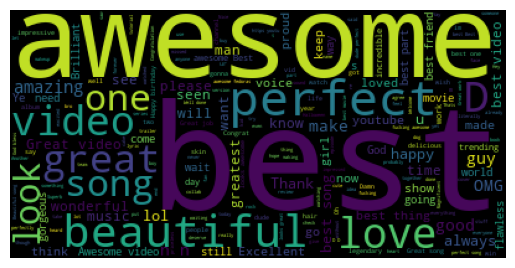

In [157]:
plt.imshow(wordcloud)
plt.axis('off')

In [158]:
total_comments_negative = ' '.join(comments_negative['comment_text'])

In [159]:
wordcloud2 = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

(-0.5, 399.5, 199.5, -0.5)

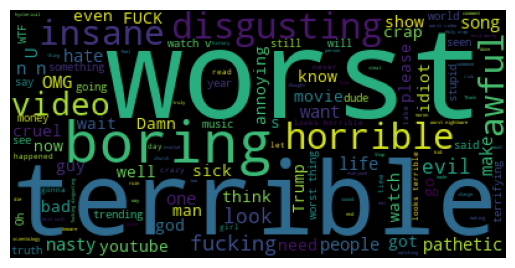

In [160]:
plt.imshow(wordcloud2)
plt.axis('off')

## 4.. Perform Emoji's Analysis

In [161]:
import emoji

In [162]:
emoji.__version__

'2.10.1'

In [163]:
comments['comment_text'].head(6)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
Name: comment_text, dtype: object

In [164]:
comment = 'trending 😉'

In [165]:
[char for char in comment if char in emoji.EMOJI_DATA]

['😉']

In [166]:
emoji_list = []

for char in comment:
    if char in emoji.EMOJI_DATA:
        emoji_list.append(char)

In [167]:
emoji_list

['😉']

In [168]:
all_emojis_list = []

for comment in comments['comment_text'].dropna():
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojis_list.append(char)

In [169]:
all_emojis_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [170]:
from collections import Counter

In [171]:
Counter(all_emojis_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [172]:
Counter(all_emojis_list).most_common(10)[0]

('😂', 36987)

In [173]:
Counter(all_emojis_list).most_common(10)[0][0]

'😂'

In [174]:
Counter(all_emojis_list).most_common(10)[1][0]

'😍'

In [175]:
Counter(all_emojis_list).most_common(10)[2][0]

'❤'

In [176]:
emojis = [Counter(all_emojis_list).most_common(10)[i][0] for i in range(10)]

In [177]:
Counter(all_emojis_list).most_common(10)[0][1]

36987

In [178]:
Counter(all_emojis_list).most_common(10)[1][1]

33453

In [179]:
Counter(all_emojis_list).most_common(10)[2][1]

31119

In [180]:
freqs = [Counter(all_emojis_list).most_common(10)[i][1] for i in range(10)]

In [181]:
freqs

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [182]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [183]:
trace = go.Bar(x=emojis , y=freqs)

In [184]:
iplot([trace])

## 5.. Collect Entire data of Youtube !

In [185]:
import os

In [186]:
files= os.listdir(r'additional_data')

In [187]:
files

['IN_category_id.json',
 'MXvideos.csv',
 'RU_category_id.json',
 'JP_category_id.json',
 'FR_category_id.json',
 'INvideos.csv',
 'GB_category_id.json',
 'DEvideos.csv',
 'JPvideos.csv',
 'KR_category_id.json',
 'KRvideos.csv',
 'CAvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'FRvideos.csv',
 'CA_category_id.json',
 'US_category_id.json',
 'DE_category_id.json',
 'USvideos.csv',
 'GBvideos.csv']

In [188]:
files_csv = [file for file in files if '.csv' in file]

In [189]:
files_csv

['MXvideos.csv',
 'INvideos.csv',
 'DEvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'CAvideos.csv',
 'RUvideos.csv',
 'FRvideos.csv',
 'USvideos.csv',
 'GBvideos.csv']

In [190]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [191]:
full_df = pd.DataFrame()
path = r'additional_data'


for file in files_csv:
    current_df = pd.read_csv(path+'/'+file , encoding='iso-8859-1' , on_bad_lines="skip")
    
    full_df = pd.concat([full_df , current_df] , ignore_index=True)

In [192]:
full_df.shape

(375942, 16)

## 6.. Export your data into (csv, json, db)

In [193]:
full_df[full_df.duplicated()].shape

(36417, 16)

In [194]:
full_df = full_df.drop_duplicates()

In [195]:
full_df.shape

(339525, 16)

#### a... Storing data into csv ..

In [196]:
full_df[0:1000].to_csv(r'youtube_sample.csv' , index=False)

#### b... Storing data into json

In [197]:
full_df[0:1000].to_json(r'youtube_sample.json')

## 7.. Which Category has the maximum likes ?

In [203]:
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...


In [204]:
full_df['category_id'].unique()

array([24, 22, 25, 26, 10, 23, 17,  2,  1, 29, 27, 28, 20, 15, 19, 43, 30,
       44])

In [205]:
json_df = pd.read_json(r'additional_data/US_category_id.json')

In [206]:
json_df

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [207]:
json_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [208]:
json_df['items'][1]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
 'id': '2',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Autos & Vehicles',
  'assignable': True}}

In [209]:
cat_dict = {}

for item in json_df['items'].values:
    cat_dict[int(item['id'])] = item['snippet']['title']

In [210]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [211]:
full_df['category_name'] = full_df['category_id'].map(cat_dict)

In [212]:
full_df.head(4)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,Entertainment
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,People & Blogs
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,News & Politics
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,News & Politics


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Entertainment'),
  Text(1, 0, 'People & Blogs'),
  Text(2, 0, 'News & Politics'),
  Text(3, 0, 'Howto & Style'),
  Text(4, 0, 'Music'),
  Text(5, 0, 'Comedy'),
  Text(6, 0, 'Sports'),
  Text(7, 0, 'Autos & Vehicles'),
  Text(8, 0, 'Film & Animation'),
  Text(9, 0, 'Nonprofits & Activism'),
  Text(10, 0, 'Education'),
  Text(11, 0, 'Science & Technology'),
  Text(12, 0, 'Gaming'),
  Text(13, 0, 'Pets & Animals'),
  Text(14, 0, 'Travel & Events'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

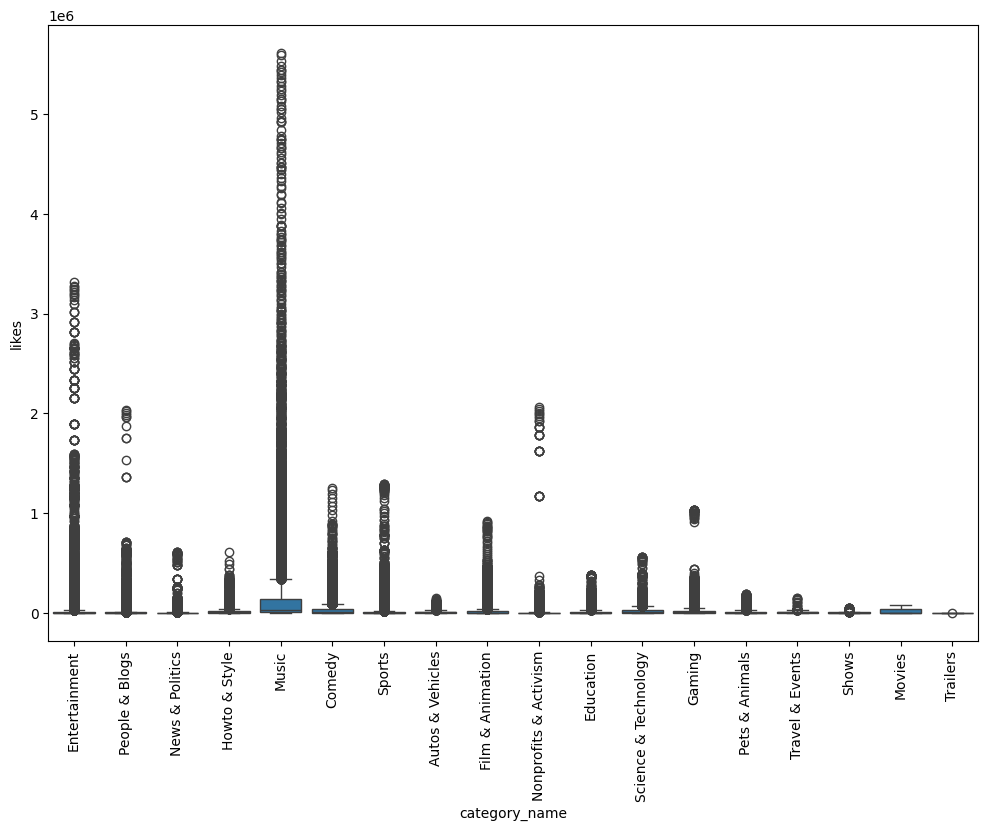

In [213]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name' , y='likes' , data=full_df)
plt.xticks(rotation='vertical')

## 8.. Find out whether audience is engaged or not

In [214]:
full_df['like_rate'] = (full_df['likes']/full_df['views'])*100
full_df['dislike_rate'] = (full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate'] = (full_df['comment_count']/full_df['views'])*100

In [215]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

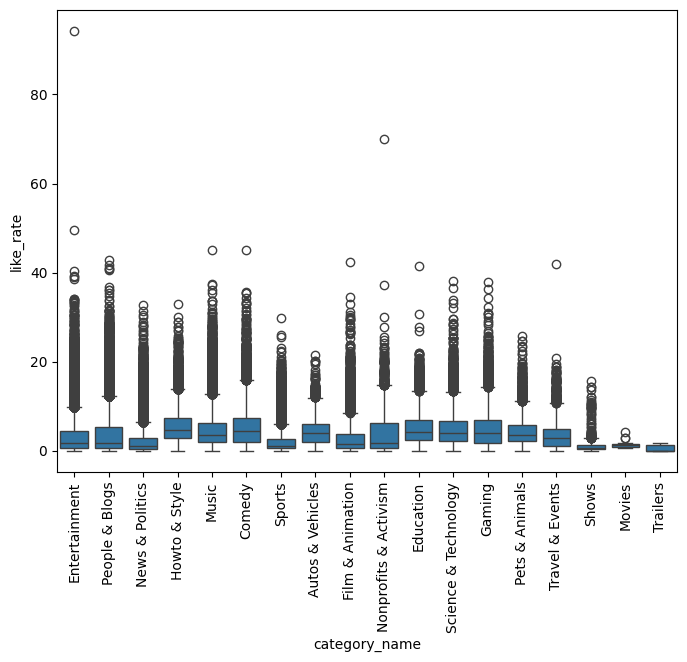

In [216]:
plt.figure(figsize=(8,6))
sns.boxplot(x='category_name' , y='like_rate' , data=full_df)
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='views', ylabel='likes'>

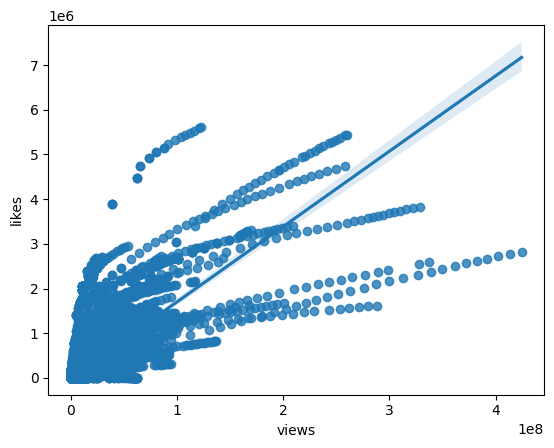

In [217]:
sns.regplot(x='views' , y='likes' , data = full_df)

In [218]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

In [219]:
full_df[['views', 'likes', 'dislikes']].corr()

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


<Axes: >

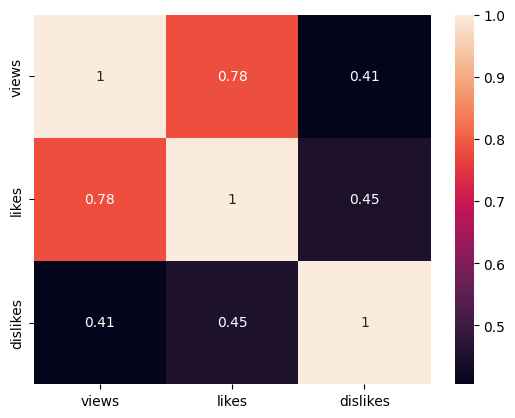

In [220]:
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr() , annot=True)

## 9.. Which channels have the largest number of trending videos?

In [221]:
full_df.head(6)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,Entertainment,1.348467,0.116403,0.592010
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,People & Blogs,0.258164,0.165758,0.351522
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,News & Politics,7.426652,0.195496,0.446114
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,News & Politics,0.393123,0.177842,0.216322
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,Howto & Style,11.557009,0.136210,1.485704
5,Q9kK6NWZR1U,17.14.11,Asi se sintio Terremoto en iraq al bordo de ir...,MÃSICA & ENTRETENIMIENTO,10,2017-11-12T20:17:38.000Z,[none],129645,506,67,239,https://i.ytimg.com/vi/Q9kK6NWZR1U/default.jpg,False,False,False,Un fuerte sismo ha afectado en la noche de est...,Music,0.390297,0.051680,0.184350


In [222]:
full_df['channel_title'].value_counts()

channel_title
The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
ABIZ ENT BUZZ                           1
JENNYMOMENT                             1
Drache Offiziell                        1
Jules                                   1
The Chainsmokers                        1
Name: count, Length: 37824, dtype: int64

In [223]:
cdf = full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()

In [224]:
cdf = cdf.rename(columns={0:'total_videos'})

In [225]:
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


In [226]:
import plotly.express as px

In [227]:
px.bar(data_frame=cdf[0:20] , x='channel_title' , y='total_videos')

## 10.. Does Punctuations in title and tags have any relation with views, likes, dislikes comments?

In [228]:
full_df['title'][0]

'CapÃ\xadtulo 12 | MasterChef 2017'

In [229]:
import string

In [230]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [231]:
len([char for char in full_df['title'][0] if char in string.punctuation])

1

In [232]:
def punc_count(text):
    return len([char for char in text if char in string.punctuation])

In [233]:
sample = full_df[0:10000]

In [234]:
sample['count_punc'] = sample['title'].apply(punc_count)

In [235]:
sample['count_punc']

0       1
1       3
2       1
3       1
4       1
       ..
9995    2
9996    3
9997    1
9998    1
9999    0
Name: count_punc, Length: 10000, dtype: int64

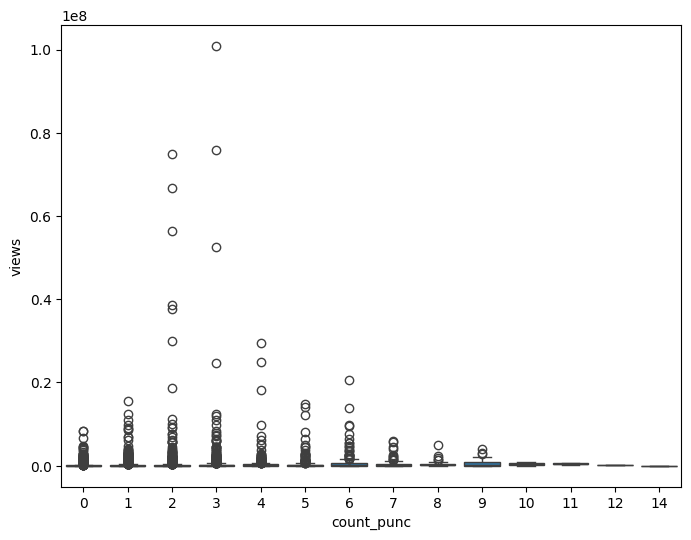

In [236]:
plt.figure(figsize=(8,6))
sns.boxplot(x='count_punc' , y='views' , data=sample)
plt.show()

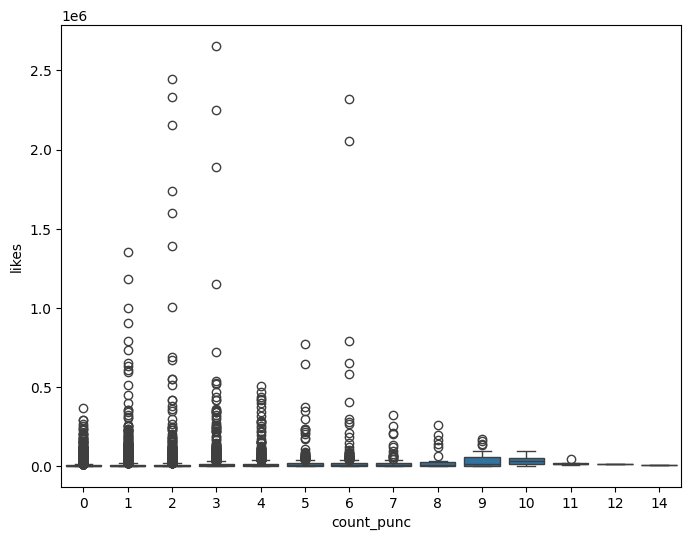

In [237]:
plt.figure(figsize=(8,6))
sns.boxplot(x='count_punc' , y='likes' , data=sample)
plt.show()